## Observations and Insights 

* The number of mice utilized for each drug regimen is consistant at 24 or 25 mice. But the actual datapoints varies between 148 and 230.
* There is a positive correlation between Mouse Weight and Tumor Volume.   As the mouse weight increases so does the tumor volume.
* The two best drugs in terms of last tumor volume are Capomulin and Ramicane.  

|Drug Regimen|All Data Points Average Tumor Volume|Last Average Tumor Volume|
|------------|------------------------------------|-------------------------|
|Capomulin   |         	                     40.68|	                   36.67|
|Ceftamin	 |                               52.60|	                   57.75|
|Infubinol   |                               52.89|                    58.18|
|Ketapril    |                               55.24|	                   62.81|
|Naftisol	 |                               54.33|	                   61.21|
|Placebo 	 |                               54.03|	                   60.51|
|Propriva	 |                               52.32|	                   56.49|
|Ramicane	 |                               40.22|	                   36.19|
|Stelasyn	 |                               54.23|	                   61.00|
|Zoniferol   |                               53.23|	                   59.18|
|All Drugs   |                               50.98|	                   54.97|

This trend continues when a random mouse was investigaged for each of the 4 suggested Drug Regimens

![line_chart](../Images/random_mouse_line.jpg)

* The mice are evenly split between Male (50.40 %) and Female (49.60 %)

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.patches as mpatches

# Setup paths to files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata_df, study_results_df, how='outer', on='Mouse ID')

# Display the data table for preview
combined_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


| # of Purchases |  # of Users |
|----------------|-------------|
|               1|          414|
|               2|          124|
|               3|           35|
|               4|            2|
|               5|            1|

In [2]:
# Checking the number of mice
orig_no_mice = len(pd.unique(combined_mouse_df['Mouse ID']))
orig_no_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
count_series = combined_mouse_df.groupby(['Mouse ID','Timepoint']).size()

# Turn back into a data frame so it is easier to work with
count_df = count_series.to_frame(name = 'size').reset_index()

# Sort the data and create a duplicates data frame of the duplicate records
sorted_count_df = count_df.sort_values('size', ascending=False)
dupicates_count_mouse_df = sorted_count_df.loc[sorted_count_df['size'] > 1]

# Output the duplicates to identify the mice that have duplicates
dupicates_count_mouse_df

,Mouse ID,Timepoint,size
590,g989,20,2
589,g989,15,2
588,g989,10,2
587,g989,5,2
586,g989,0,2


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_combined_mouse_df = combined_mouse_df.loc[combined_mouse_df['Mouse ID'] == 'g989']

# Output the records that for mouse that has duplicates
duplicates_combined_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_combined_mouse_df = combined_mouse_df[combined_mouse_df['Mouse ID'] != 'g989']

# Preview the cleaned data
cleaned_combined_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
no_mice = len(pd.unique(cleaned_combined_mouse_df['Mouse ID']))

# Output the new number of mice (should be previous count - 1 (249-1))
no_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting tregimen_grouped = cleaned_combined_mouse_df.groupby(["Drug Regimen"])

# Group the data by Drug Regimen
grouped_mouse_data = cleaned_combined_mouse_df.groupby('Drug Regimen')

# Perform the statistical calculates
tumor_volume_mean = grouped_mouse_data['Tumor Volume (mm3)'].mean()
tumor_volume_median = grouped_mouse_data['Tumor Volume (mm3)'].median()
tumor_volume_variance = grouped_mouse_data['Tumor Volume (mm3)'].var()
tumor_volume_std = grouped_mouse_data['Tumor Volume (mm3)'].std()
tumor_volume_sem = grouped_mouse_data['Tumor Volume (mm3)'].sem()

# Create a dataframe with all of our summary information
summary_statistics_df = pd.DataFrame({"Mean":tumor_volume_mean,
                                "Median":tumor_volume_median,
                                "Variance":tumor_volume_variance,
                                "Standard Deviation":tumor_volume_std,
                                "Standard Error of Measurement":tumor_volume_sem
                                 })
# Preview the statistics summary information
summary_statistics_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Measurement
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
summary_statistics_df = cleaned_combined_mouse_df.groupby('Drug Regimen') \
                            .agg([('Mean', 'mean'),
                                  ("Median",'median'),
                                  ("Variance",'var'),
                                  ("Standard Deviation",'sem'),
                                  ("Standard Error of Measurement",'sem')
                                 ])

# Preview the summary statistics data
summary_statistics_df


Age_months                                       \
                   Mean Median   Variance Standard Deviation   
Drug Regimen                                                   
Capomulin     13.456522   16.5  59.620372           0.509136   
Ceftamin      13.247191   12.0  65.147591           0.604977   
Infubinol     16.230337   20.0  56.404272           0.562919   
Ketapril      15.659574   18.0  36.236432           0.439030   
Naftisol      12.000000    9.0  45.102703           0.492430   
Placebo       10.734807   10.0  40.384837           0.472356   
Propriva      10.006757    7.5  48.251655           0.570986   
Ramicane      10.684211    9.0  35.362393           0.393825   
Stelasyn      12.784530   14.0  63.036648           0.590143   
Zoniferol     12.598901   12.5  33.479115           0.428895   

                                           Weight (g)                    \
             Standard Error of Measurement       Mean Median   Variance   
Drug Regimen                                                              
Capomulin                         0.509136  19.965217   20.5   7.466034   
Ceftamin                          0.604977  27.398876   28.0   2.501016   
Infubinol                         0.562919  27.196629   27.0   4.769028   
Ketapril                          0.439030  27.861702   28.0   3.392536   
Naftisol                          0.492430  27.166667   27.0   2.247748   
Placebo                           0.472356  27.928177   28.0   3.378146   
Propriva                          0.570986  27.135135   26.0   2.933995   
Ramicane                          0.393825  19.679825   19.0  10.465318   
Stelasyn                          0.590143  27.856354   28.0   2.701473   
Zoniferol                         0.428895  27.692308   28.0   2.015300   

                                                               ...  \
             Standard Deviation Standard Error of Measurement  ...   
Drug Regimen                                                   ...   
Capomulin              0.180169                      0.180169  ...   
Ceftamin               0.118535                      0.118535  ...   
Infubinol              0.163684                      0.163684  ...   
Ketapril               0.134333                      0.134333  ...   
Naftisol               0.109930                      0.109930  ...   
Placebo                0.136615                      0.136615  ...   
Propriva               0.140799                      0.140799  ...   
Ramicane               0.214244                      0.214244  ...   
Stelasyn               0.122169                      0.122169  ...   
Zoniferol              0.105229                      0.105229  ...   

             Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           0.329346   
Ceftamin              52.591172  51.776157  39.290177           0.469821   
Infubinol             52.884795  51.820584  43.128684           0.492236   
Ketapril              55.235638  53.698743  68.553577           0.603860   
Naftisol              54.331565  52.509285  66.173479           0.596466   
Placebo               54.033581  52.288934  61.168083           0.581331   
Propriva              52.320930  50.446266  43.852013           0.544332   
Ramicane              40.216745  40.673236  23.486704           0.320955   
Stelasyn              54.233149  52.431737  59.450562           0.573111   
Zoniferol             53.236507  51.818479  48.533355           0.516398   

                                           Metastatic Sites                   \
             Standard Error of Measurement             Mean Median  Variance   
Drug Regimen                                                                   
Capomulin                         0.329346         0.713043     

## Bar and Pie Charts

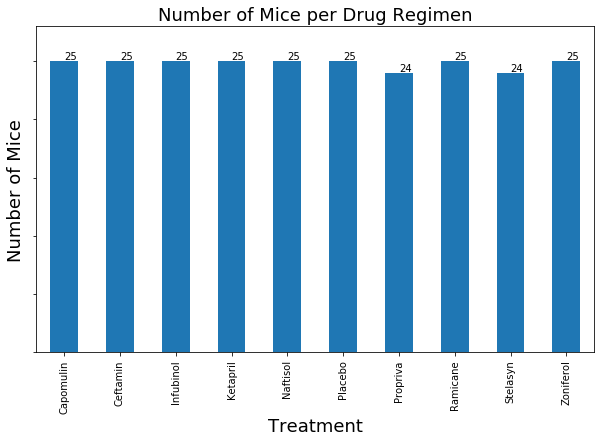

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Group the data by Drug Regimen and then get the unique mice 
no_mice_data = cleaned_combined_mouse_df.groupby("Drug Regimen").nunique()['Mouse ID']

# Create the bar chart
no_mice_bar = no_mice_data.plot(kind='bar',figsize=(10,6))

# Setup the title and leabels
no_mice_bar.set_title("Number of Mice per Drug Regimen", fontsize=18)
no_mice_bar.set_xlabel("Treatment", fontsize=18)
no_mice_bar.set_ylabel("Number of Mice", fontsize=18);

# Get rid of the numbers along the y axis because we have them on each datapoint
no_mice_bar.set_yticklabels([])

# Set the y limit
no_mice_bar.set_ylim(0,28)

# Place the value on top of each Drug Regimen
for index,value in enumerate(no_mice_data):
    no_mice_bar.annotate(value,(index, value), xytext=(0, 2),textcoords='offset points')




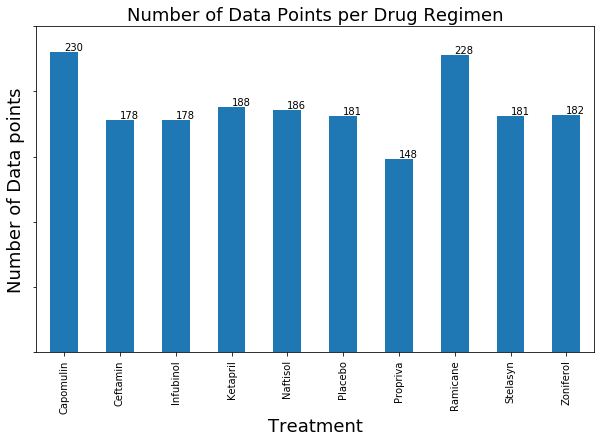

In [10]:
# Generate a bar plot showing the total number of mice / timepoint combinations
# for each treatment throughout the course of the study using pandas. 
no_mice_data = cleaned_combined_mouse_df.groupby("Drug Regimen")['Timepoint'].count()

# Create the bar chart
no_mice_bar = no_mice_data.plot(kind='bar',figsize=(10,6))

# Setup title and labels
no_mice_bar.set_title("Number of Data Points per Drug Regimen", fontsize=18)
no_mice_bar.set_xlabel("Treatment", fontsize=18)
no_mice_bar.set_ylabel("Number of Data points", fontsize=18);

# Get rid of the numbers along the y axis because we have them on each datapoint
no_mice_bar.set_yticklabels([])

# Set the y limit
no_mice_bar.set_ylim(0,250)

# Place the value on top of each Drug Regimen
for index,value in enumerate(no_mice_data):
    no_mice_bar.annotate(value,(index, value), xytext=(0, 2),textcoords='offset points')




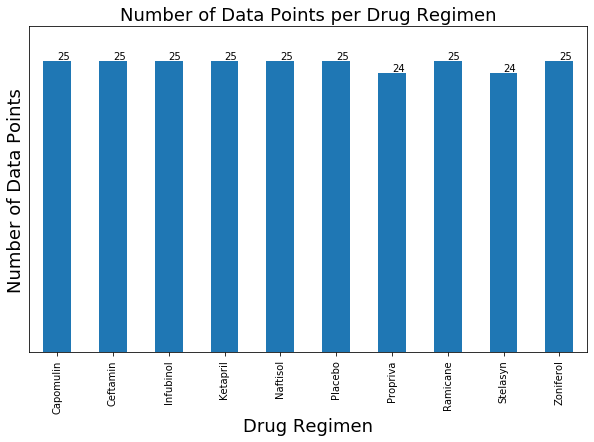

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

# Group the data by Drug Regimen and then get the unique mice 
no_mice_data = cleaned_combined_mouse_df.groupby("Drug Regimen").nunique()['Mouse ID']

# Create the bar chart
f, ax = plt.subplots(figsize=(10,6)) 
plt.xdata = no_mice_data.plot.bar()
plt.xlabel('Drug Regimen', fontsize=18)
plt.ylabel('Number of Data Points', fontsize=18)
plt.yticks([])
plt.title('Number of Data Points per Drug Regimen', fontsize=18)
plt.ylim(0,28)

# Place the value on top of each Drug Regimen
for index,value in enumerate(no_mice_data):
    plt.annotate(value,(index, value), xytext=(0, 2),textcoords='offset points')
plt.show()




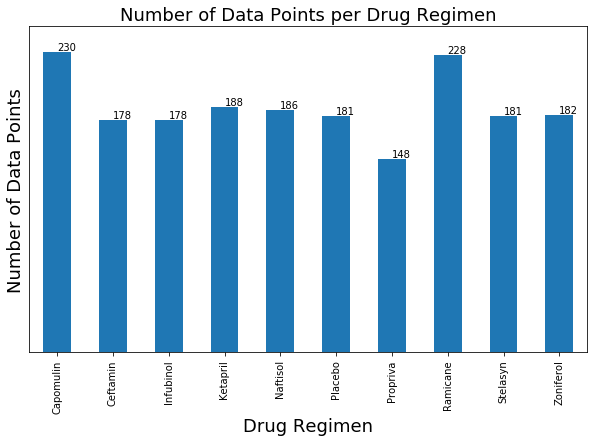

In [12]:
# Generate a bar plot showing number of mouse / timepoint combinations
# for each treatment regimen using pyplot
no_mice_data = cleaned_combined_mouse_df.groupby("Drug Regimen")['Timepoint'].count()

# Create the bar chart
f, ax = plt.subplots(figsize=(10,6)) 
plt.xdata = no_mice_data.plot.bar()

# Setup the title and labels
plt.xlabel('Drug Regimen', fontsize=18)
plt.ylabel('Number of Data Points', fontsize=18)

plt.yticks([])
plt.title('Number of Data Points per Drug Regimen', fontsize=18)

# Set the y limit
plt.ylim(0,250)
# Place the value on top of each Drug Regimen
for index,value in enumerate(no_mice_data):
    plt.annotate(value,(index, value), xytext=(0, 2),textcoords='offset points')

# Show the chart
plt.show()

Text(0.5, 1.0, 'Mouse Gender Percents')

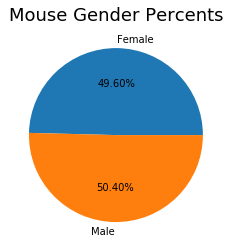

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group the data by sex and then get the unique Mouse IDs
gender_data = cleaned_combined_mouse_df.groupby('Sex').nunique()['Mouse ID']

# Clear the name created by the groupby
gender_data.name = ''

# Create the pie chart
gender_data_pie = gender_data.plot(kind='pie',autopct='%.2f%%')
gender_data_pie.set_title('Mouse Gender Percents', fontsize=18)


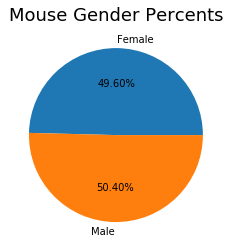

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Group the data by sex and then get the unique Mouse IDs
gender_data = cleaned_combined_mouse_df.groupby('Sex').nunique()['Mouse ID']


# Create the pie chart
plt.pie(gender_data,labels=gender_data.index,autopct='%.2f%%')
plt.title('Mouse Gender Percents', fontsize=18)

# Show the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [16]:
# Start by getting the last (greatest) timepoint for each mouse
last_records_df = cleaned_combined_mouse_df.groupby("Mouse ID").max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_full_data_df = pd.merge(cleaned_combined_mouse_df,last_records_df,how='inner',on=('Mouse ID','Timepoint'))

In [17]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = cleaned_combined_mouse_df.groupby("Drug Regimen").nunique()['Drug Regimen'].index.tolist()
box_drugs = ['Capomulin','Ramicane','Infubinol', 'Ceftamin']

In [18]:
# Locate the rows which contain mice on each drug and get the tumor volumes
tumor_vols =  last_full_data_df['Tumor Volume (mm3)']
   
# Create dataframes for the 4 identified Drug Regimens 
capomulin_records_df = last_full_data_df.loc[last_full_data_df['Drug Regimen'] == "Capomulin"]
ramicane_records_df = last_full_data_df.loc[last_full_data_df['Drug Regimen'] == "Ramicane"]
infubinol_records_df = last_full_data_df.loc[last_full_data_df['Drug Regimen'] == "Infubinol"]
ceftamin_records_df = last_full_data_df.loc[last_full_data_df['Drug Regimen'] == "Ceftamin"]

# Create the tumor vols data for each of the 4 identified Drug Regimens
capomulin_tumor_vols = capomulin_records_df['Tumor Volume (mm3)']
ramicane_tumor_vols = ramicane_records_df['Tumor Volume (mm3)']
infubinol_tumor_vols = infubinol_records_df['Tumor Volume (mm3)']
ceftamin_tumor_vols = ceftamin_records_df['Tumor Volume (mm3)']

# Create a function to analyze the last tumor volume for all drugs and for individual drugs

In [19]:
def drug_regimen_analysis(drug='',type='average'):
    '''
    This funtion accepts a Drug Regimen (can accept null to perform for all Drug Regimens)
    and a type (average, outlier).  The outliers or the average are calculated and the output
    of the results are then performed.
    
    '''
    if drug == '':
        analysis_df = last_full_data_df
    else:
        analysis_df = last_full_data_df.loc[last_full_data_df['Drug Regimen'] == drug]
    
    # Calculate the average tumor volume
    last_average_tumor_volume = analysis_df['Tumor Volume (mm3)'].mean()    
        
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = analysis_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq    
  
    # Calculate the lower and upper bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # See if there are any outliers
    lower_outliers_df = analysis_df.loc[analysis_df['Tumor Volume (mm3)'] < lower_bound]
    upper_outliers_df = analysis_df.loc[analysis_df['Tumor Volume (mm3)'] > upper_bound]

    # Output the results for all drug regimens
    if type == 'average':
        if drug == '':
            print(f'The average last tumor volume for all drug regimens is {round(last_average_tumor_volume,2)}')
        else:
            print(f'The average last tumor volume for {drug} is {round(last_average_tumor_volume,2)}')                  
    
    else:
        if drug == '':
            print('All Drug Regimens')
        else:
            print(drug)
        print('-----------------')
        print(f"Values below {round(lower_bound,2)} could be outliers.")
        print(f"Values above {round(upper_bound,2)} could be outliers.")
        print("\n")
        print(f'The rows that are lower outliers:')
        print('----------------------------------')
        if len(lower_outliers_df) == 0:
            print('No outliers found')
        else:
            print(lower_outliers_df)
        print("\n")
        print(f'The rows that are upper outliers:')
        print('----------------------------------')
        if len(upper_outliers_df) == 0:
            print('No outliers found')
        else:
            print(upper_outliers_df)       
    

In [20]:
# Get the average last tumor volume for all Drug Regimens
drug_regimen_analysis(drug='',type='average')

The average last tumor volume for all drug regimens is 54.97


In [21]:
# Get the average last tumor volume for all Drug Regimens
for drug in drugs:
    drug_regimen_analysis(drug,'average')

The average last tumor volume for Capomulin is 36.67
The average last tumor volume for Ceftamin is 57.75
The average last tumor volume for Infubinol is 58.18
The average last tumor volume for Ketapril is 62.81
The average last tumor volume for Naftisol is 61.21
The average last tumor volume for Placebo is 60.51
The average last tumor volume for Propriva is 56.49
The average last tumor volume for Ramicane is 36.19
The average last tumor volume for Stelasyn is 61.0
The average last tumor volume for Zoniferol is 59.18


In [22]:
# Calculate the IQR and quantitatively determine if there are any potential outliers for 
# all Drug Regimens
drug_regimen_analysis(drug='',type='outliers')

All Drug Regimens
-----------------
Values below 17.11 could be outliers.
Values above 93.82 could be outliers.


The rows that are lower outliers:
----------------------------------
No outliers found


The rows that are upper outliers:
----------------------------------
No outliers found


In [23]:
# Calculate the IQR and quantitatively determine if there are any potential outliers 
# for Capomulin
drug = drugs[0]
drug_regimen_analysis(drug,type='outliers')


Capomulin
-----------------
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.


The rows that are lower outliers:
----------------------------------
No outliers found


The rows that are upper outliers:
----------------------------------
No outliers found


In [24]:
# Calculate the IQR and quantitatively determine if there are any potential outliers 
# for Ceftamin
drug = drugs[1]
drug_regimen_analysis(drug,type='outliers')


Ceftamin
-----------------
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


The rows that are lower outliers:
----------------------------------
No outliers found


The rows that are upper outliers:
----------------------------------
No outliers found


In [25]:
# Calculate the IQR and quantitatively determine if there are any potential outliers 
# for Infubinol
drug = drugs[2]
drug_regimen_analysis(drug,type='outliers')

Infubinol
-----------------
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.


The rows that are lower outliers:
----------------------------------
   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
74     c326    Infubinol  Female          18          25          5   

    Tumor Volume (mm3)  Metastatic Sites  
74           36.321346                 0  


The rows that are upper outliers:
----------------------------------
No outliers found


In [26]:
# Calculate the IQR and quantitatively determine if there are any potential outliers 
# for Ketapril
drug = drugs[3]
drug_regimen_analysis(drug,type='outliers')

Ketapril
-----------------
Values below 36.99 could be outliers.
Values above 89.6 could be outliers.


The rows that are lower outliers:
----------------------------------
No outliers found


The rows that are upper outliers:
----------------------------------
No outliers found


In [27]:
# Calculate the IQR and quantitatively determine if there are any potential outliers 
# for Naftisol
drug = drugs[4]
drug_regimen_analysis(drug,type='outliers')

Naftisol
-----------------
Values below 25.85 could be outliers.
Values above 95.79 could be outliers.


The rows that are lower outliers:
----------------------------------
No outliers found


The rows that are upper outliers:
----------------------------------
No outliers found


In [28]:
# Calculate the IQR and quantitatively determine if there are any potential outliers 
# for Placebo
drug = drugs[5]
drug_regimen_analysis(drug,type='outliers')

Placebo
-----------------
Values below 30.16 could be outliers.
Values above 90.92 could be outliers.


The rows that are lower outliers:
----------------------------------
No outliers found


The rows that are upper outliers:
----------------------------------
No outliers found


In [29]:
# Calculate the IQR and quantitatively determine if there are any potential outliers 
# for Propriva
drug_regimen_analysis(drug,type='outliers')

Placebo
-----------------
Values below 30.16 could be outliers.
Values above 90.92 could be outliers.


The rows that are lower outliers:
----------------------------------
No outliers found


The rows that are upper outliers:
----------------------------------
No outliers found


In [30]:
# Calculate the IQR and quantitatively determine if there are any potential outliers 
# for Ramicane
drug = drugs[7]
drug_regimen_analysis(drug,type='outliers')

Ramicane
-----------------
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


The rows that are lower outliers:
----------------------------------
No outliers found


The rows that are upper outliers:
----------------------------------
No outliers found


In [31]:
# Calculate the IQR and quantitatively determine if there are any potential outliers 
# for Stelasyn
drug = drugs[8]
drug_regimen_analysis(drug,type='outliers')

Stelasyn
-----------------
Values below 27.54 could be outliers.
Values above 94.04 could be outliers.


The rows that are lower outliers:
----------------------------------
No outliers found


The rows that are upper outliers:
----------------------------------
No outliers found


In [32]:
# Calculate the IQR and quantitatively determine if there are any potential outliers 
# for Zoniferol
drug = drugs[9]
drug_regimen_analysis(drug,type='outliers')

Zoniferol
-----------------
Values below 24.78 could be outliers.
Values above 92.0 could be outliers.


The rows that are lower outliers:
----------------------------------
No outliers found


The rows that are upper outliers:
----------------------------------
No outliers found


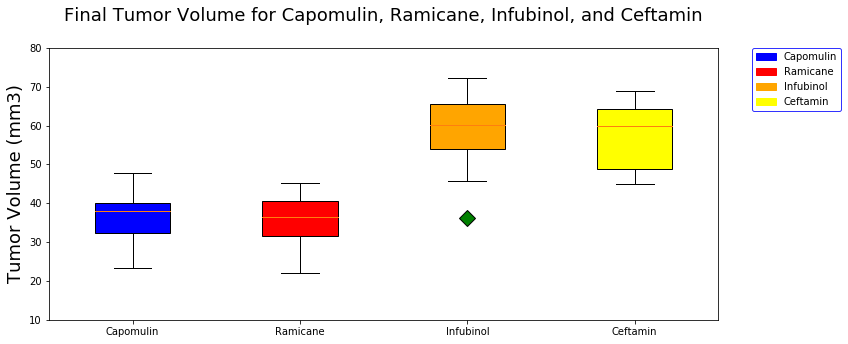

In [84]:
# Generate a box plot of the final tumor volume of each mouse across four Drug Regimens of interest

# Setup the marker
flierprops = dict(marker='D', markerfacecolor='green', markersize=12, linestyle='none')


# Create the box plot
box_plot_data=[capomulin_tumor_vols,ramicane_tumor_vols,infubinol_tumor_vols,ceftamin_tumor_vols]
f, ax = plt.subplots(figsize=(12,5))
drugs_box_plot = plt.boxplot(box_plot_data,labels=box_drugs,flierprops=flierprops, patch_artist=True)

# Set colors for each boxplot
colors = ['blue','red','orange','yellow']
for patch, color in zip(drugs_box_plot['boxes'], colors):
    patch.set_facecolor(color)

#'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin    
capomulin_patch = mpatches.Patch(color='blue', label='Capomulin')
ramicane_patch = mpatches.Patch(color='red', label='Ramicane')
infubinol_patch = mpatches.Patch(color='orange', label='Infubinol')
ceftamin_patch = mpatches.Patch(color='yellow', label='Ceftamin')

plt.legend(handles=[capomulin_patch,ramicane_patch,infubinol_patch,ceftamin_patch],edgecolor='blue',bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)    
# leg = plt.legend(box_drugs,edgecolor='blue',c=colors,bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
# leg_set_labelcolor = colors

# Setup title and lables
plt.title('Final Tumor Volume for Capomulin, Ramicane, Infubinol, and Ceftamin\n', fontsize=18) 
plt.ylabel('Tumor Volume (mm3)', fontsize=18)

# Limit the chart
plt.ylim(10, 80)

# Show the box plot
plt.show()


In [80]:
box_drugs

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

## Line and Scatter Plots

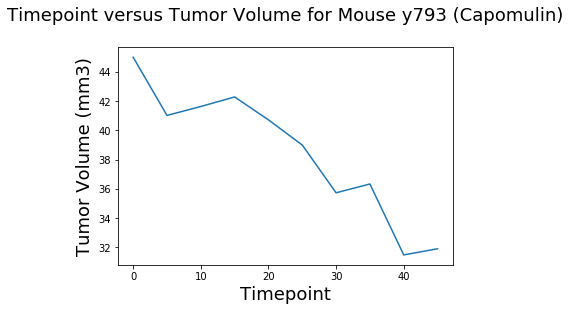

In [34]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# using a randomly selected mouse id
chosen_mouse = 'y793'
chosen_mouse_df = cleaned_combined_mouse_df.loc[cleaned_combined_mouse_df['Mouse ID'] == chosen_mouse]

# Setup the x and y axis
x_axis = chosen_mouse_df['Timepoint']
y_axis = chosen_mouse_df['Tumor Volume (mm3)']

# Create the line plot
plt.plot(x_axis, y_axis)

# Setup the title and lables
plt.title('Timepoint versus Tumor Volume for Mouse y793 (Capomulin)\n', fontsize=18)
plt.xlabel('Timepoint', fontsize=18)
plt.ylabel('Tumor Volume (mm3)', fontsize=18)

plt.show()

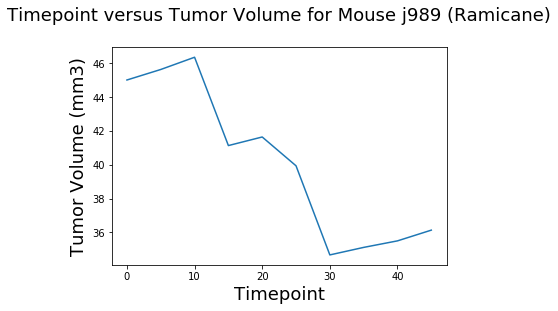

In [35]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Ramicane
# using a randomly selected mouse id
chosen_mouse = 'j989'
chosen_mouse_df = cleaned_combined_mouse_df.loc[cleaned_combined_mouse_df['Mouse ID'] == chosen_mouse]

# Setup the x and y axis
x_axis = chosen_mouse_df['Timepoint']
y_axis = chosen_mouse_df['Tumor Volume (mm3)']

# Create the line plot
plt.plot(x_axis, y_axis)

# Setup the title and labels
plt.title('Timepoint versus Tumor Volume for Mouse j989 (Ramicane)\n', fontsize=18)
plt.xlabel('Timepoint', fontsize=18)
plt.ylabel('Tumor Volume (mm3)', fontsize=18)

plt.show()

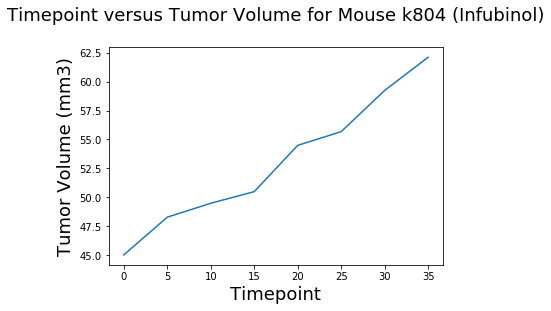

In [36]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Infubinol
# using a randomly selected mouse id
chosen_mouse = 'k804'
chosen_mouse_df = cleaned_combined_mouse_df.loc[cleaned_combined_mouse_df['Mouse ID'] == chosen_mouse]

# Setup the x and y axis
x_axis = chosen_mouse_df['Timepoint']
y_axis = chosen_mouse_df['Tumor Volume (mm3)']

# Create the line plot
plt.plot(x_axis, y_axis)

# Setup title and labels
plt.title('Timepoint versus Tumor Volume for Mouse k804 (Infubinol)\n', fontsize=18)
plt.xlabel('Timepoint', fontsize=18)
plt.ylabel('Tumor Volume (mm3)', fontsize=18)

plt.show()

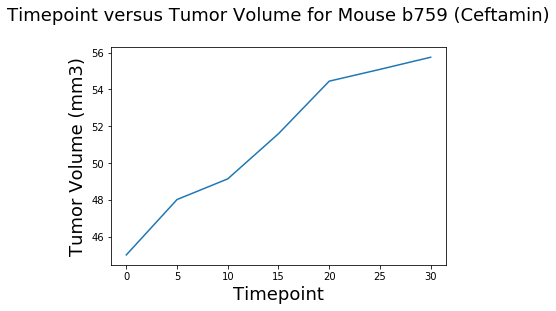

In [37]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Infubinol
# using a randomly selected mouse id
chosen_mouse = 'b759'
chosen_mouse_df = cleaned_combined_mouse_df.loc[cleaned_combined_mouse_df['Mouse ID'] == chosen_mouse]
x_axis = chosen_mouse_df['Timepoint']
y_axis = chosen_mouse_df['Tumor Volume (mm3)']

# Create the line plot
plt.plot(x_axis, y_axis)

# Setup the title and labels
plt.title('Timepoint versus Tumor Volume for Mouse b759 (Ceftamin)\n', fontsize=18)
plt.xlabel('Timepoint', fontsize=18)
plt.ylabel('Tumor Volume (mm3)', fontsize=18)

# Show the chart
plt.show()

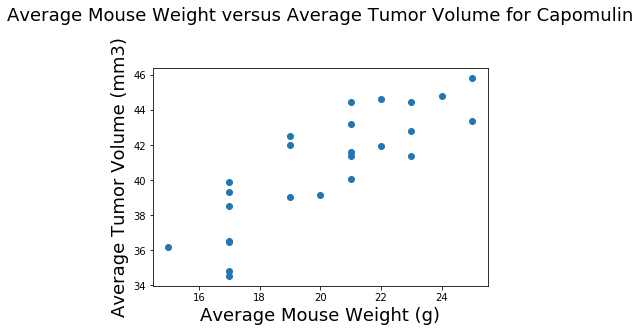

In [38]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Get the data for the Drug Regimen Capomulin
capomulin_scatter_df = cleaned_combined_mouse_df.loc[cleaned_combined_mouse_df['Drug Regimen'] == "Capomulin"]

# Calculate the average
avg_capomulin_scatter_df = capomulin_scatter_df.groupby('Mouse ID').mean()

# Setup the x and y axis
x_axis = avg_capomulin_scatter_df['Weight (g)']
y_axis = avg_capomulin_scatter_df['Tumor Volume (mm3)']

# Create the scatter plot
plt.scatter(x_axis, y_axis)

# Setup the title and labels
plt.title('Average Mouse Weight versus Average Tumor Volume for Capomulin\n\n', fontsize=18)
plt.xlabel('Average Mouse Weight (g)', fontsize=18)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=18)

# Show the scatter plot
plt.show()

## Correlation and Regression

The R-Value between Average Mouse Weights and Average Tumor Volumes is 0.84 for Capomulin Mice.


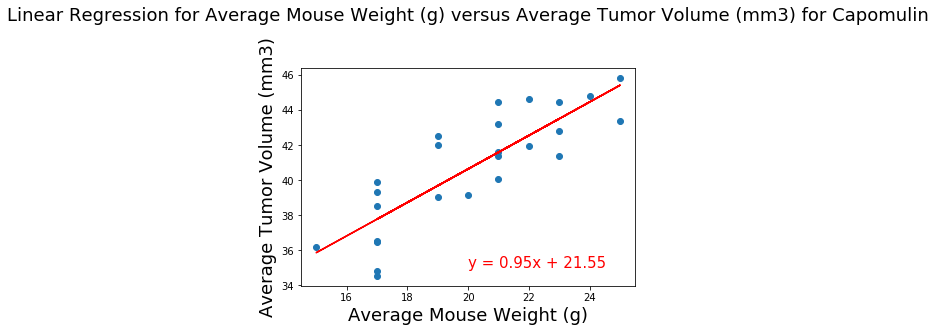

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Get the dat afor the Drug Regimen Capomulin 
capomulin_scatter_df = cleaned_combined_mouse_df.loc[cleaned_combined_mouse_df['Drug Regimen'] == "Capomulin"]

# Calculate the average
avg_capomulin_scatter_df = capomulin_scatter_df.groupby('Mouse ID').mean()

# Set the x and y axis
x_axis = avg_capomulin_scatter_df['Weight (g)']
y_axis = avg_capomulin_scatter_df['Tumor Volume (mm3)']

# Perform the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

# Output the R value
print(f"The R-Value between Average Mouse Weights and Average Tumor Volumes is {round(rvalue,2)} for Capomulin Mice.")

# Get the regress values
regress_values = x_axis * slope + intercept

# Setup the line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate the scatter plot for the line regression
plt.scatter(x_axis,y_axis)

# Inclue the line
plt.plot(x_axis,regress_values,"r-")

# Setup the labels and title
plt.xlabel('Average Mouse Weight (g)', fontsize=18)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=18)
plt.title('Linear Regression for Average Mouse Weight (g) versus Average Tumor Volume (mm3) for Capomulin\n\n', fontsize=18)

# Add the line equation
plt.annotate(line_eq,(20,35),fontsize=15,color="red")

# Show the chart
plt.show()